# Data prepration and cleaning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [3]:
df= pd.read_csv('D:/Epsilon/Lecture 17/dastasets/dastasets/titanic_full.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.drop('PassengerId', axis=1,inplace =True)
df.drop('Name', axis=1,inplace =True)
df.drop('Ticket', axis=1,inplace =True)
df.drop('Cabin', axis=1,inplace =True)
df.drop('Embarked', axis=1,inplace =True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [7]:
def gender (x):
    if x == 'male':
        return 0
    else :
        return 1
df['Sex'] = df['Sex'].apply(gender)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,NaN,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


# Filling Null Values using KNN

In [8]:
num_cols= ['Age']
from sklearn.impute import KNNImputer
imputer=KNNImputer()
for col in num_cols:
    df[col]=imputer.fit_transform(df[[col]])
df.isnull().sum()
df.shape

(891, 7)

# Data Visualization

<AxesSubplot:xlabel='Age', ylabel='Sex'>

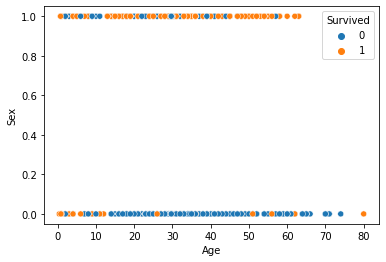

In [9]:
sns.scatterplot(x= 'Age', y = 'Sex', hue = 'Survived', data = df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

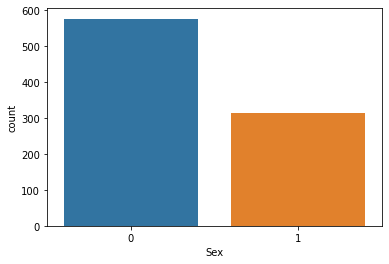

In [11]:
sns.countplot(x= 'Sex',data = df)


<AxesSubplot:xlabel='Survived', ylabel='Age'>

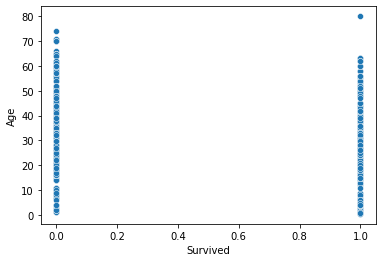

In [15]:
sns.scatterplot(x= 'Survived', y = 'Age' ,data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

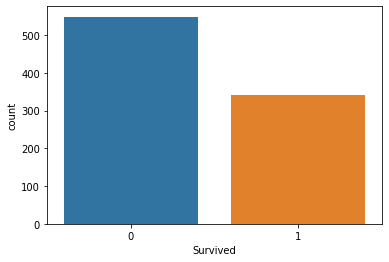

In [17]:
sns.countplot(x= 'Survived',data = df)


<AxesSubplot:xlabel='Pclass', ylabel='count'>

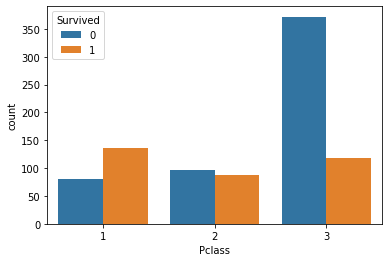

In [18]:
sns.countplot(x= 'Pclass', hue = 'Survived',data = df)


C:\Users\Mahmoud Khaled\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

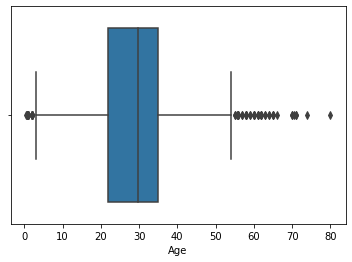

In [22]:
sns.boxplot(df['Age'])

# Remove outliers

In [23]:
from datasist.structdata import detect_outliers
indices=detect_outliers(df,0,df.columns)
df.drop(indices,inplace=True)
df.shape

(577, 7)

C:\Users\Mahmoud Khaled\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

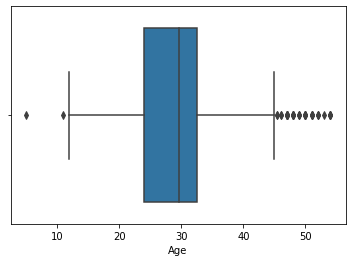

In [24]:
sns.boxplot(df['Age'])

In [25]:
x= df.drop('Survived',axis=1)
y= (df['Survived']). astype(np.float64)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

# Data Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
print (len(x_train))
print (len(x_test))
print ((x_train))

461
116
[[ 0.66572305 -0.56649528  0.88712247  3.90233287  0.         -0.55322162]
 [ 0.66572305 -0.56649528  0.00685237 -0.44827282  0.         -0.55561637]
 [ 0.66572305 -0.56649528 -0.92143311 -0.44827282  0.         -0.60857967]
 ...
 [ 0.66572305  1.76523977  0.00685237 -0.44827282  0.         -0.54297013]
 [-0.72295716 -0.56649528 -0.19801087 -0.44827282  0.         -0.09600512]
 [ 0.66572305 -0.56649528 -0.43915162 -0.44827282  0.          0.33763295]]


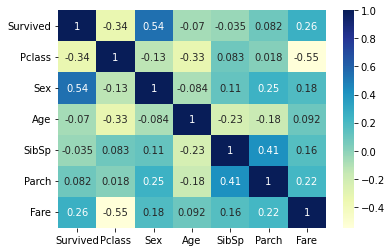

In [27]:
df.corr()
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  